# Signal Fitting
We now have a successful background model in the form of a second-order polynomial. We now wish to fit an analytical function to our signal. In this way we can then assess how some figures of merit change based on different cuts or cutting methods since we have a way to estimate both signal and background within the same region.

## Environment Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('../')
from utilities import Data, Consts

In [2]:
s = Data(*Consts().get_simulated_tuple())

In [3]:
df = s.fetch_features(['Lb_M'])

## Initial Analysis

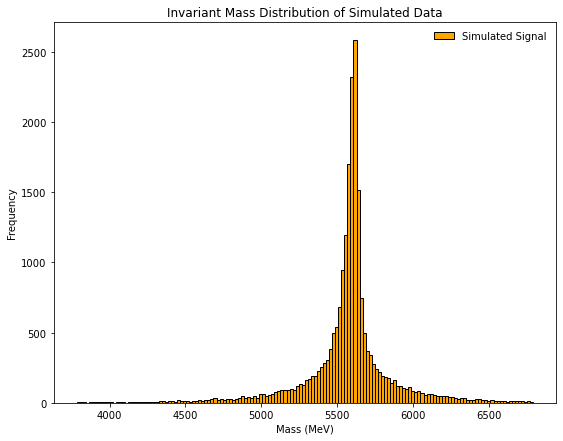

In [4]:
def hist(data, bins, savefig=None):
    fig, ax = plt.subplots(1, 1, figsize=(9, 7))
    ax.hist(data, bins=bins, edgecolor='k', color='orange', label='Simulated Signal')
    ax.set_xlabel('Mass (MeV)')
    ax.set_ylabel('Frequency')
    plt.legend(frameon=False)
    plt.title('Invariant Mass Distribution of Simulated Data')
    if savefig is not None:
        plt.savefig(f'/home/user211/project/images/signalfits/{savefig}.png', dpi=800)
    plt.show()
    
hist(df['Lb_M'], 150)

Compute the errors assuming Poission statistics within each bin that is $\sigma\propto\sqrt{N}$

In [5]:
low_mass_limit, high_mass_limit = 3500, 7000
no_bins = 150

bins = np.linspace(low_mass_limit, high_mass_limit, no_bins + 1)
bin_centres = [np.mean(bins[i:i+2]) for i in range(len(bins)-1)]
bin_width = bins[1]- bins[0]

df = df[df['Lb_M'].between(low_mass_limit, high_mass_limit)]

f1, _ = np.histogram(df['Lb_M'], bins=bins)
err1 = np.sqrt(f1)

d1 = np.array([bin_centres, f1, err1]).T

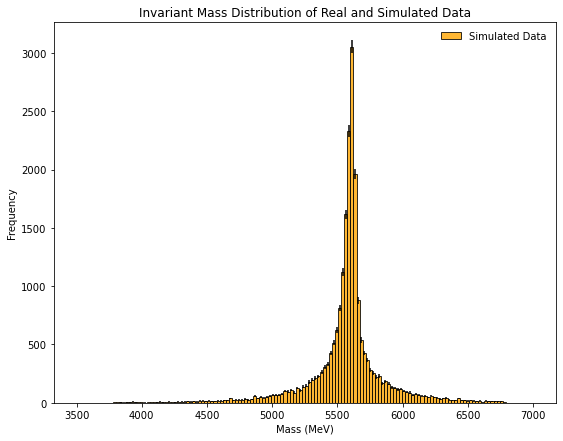

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(9, 7))
ax.bar(d1[:,0], d1[:,1], width=bin_width, yerr=d1[:,2], label='Simulated Data', edgecolor='k', alpha=0.8, color='orange')
ax.set_xlabel('Mass (MeV)')
ax.set_ylabel('Frequency')
plt.legend(frameon=False)
plt.title('Invariant Mass Distribution of Real and Simulated Data')
plt.show()

In [7]:
import SignalFunctions as sf
from scipy.optimize import curve_fit

d1 = d1[(d1[:,1] != 0)]
x, y, yerr = d1[:,0], d1[:,1], d1[:,2]
# Curve fit can take errors which then performs a standard chi-square minimisation

popt1, pcov1 = curve_fit(sf.gaussian, x, y, [100, 5500, 100], yerr, absolute_sigma=True)

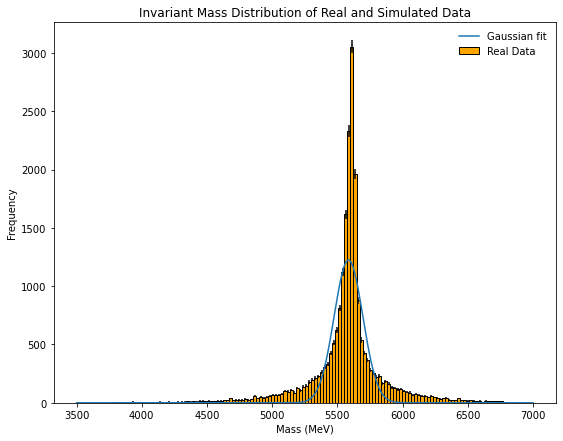

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(9, 7))
func_x = np.linspace(low_mass_limit, high_mass_limit, 500)
ax.bar(d1[:,0], d1[:,1], width=bin_width, yerr=d1[:,2], label='Real Data', edgecolor='k',color='orange')

ax.plot(func_x, sf.gaussian(func_x, *popt1), label='Gaussian fit')

ax.set_xlabel('Mass (MeV)')
ax.set_ylabel('Frequency')
plt.legend(frameon=False)
plt.title('Invariant Mass Distribution of Real and Simulated Data')
#plt.savefig('/home/user211/project/images/BackgroundFits/AllFits.png', dpi=800)
plt.show()

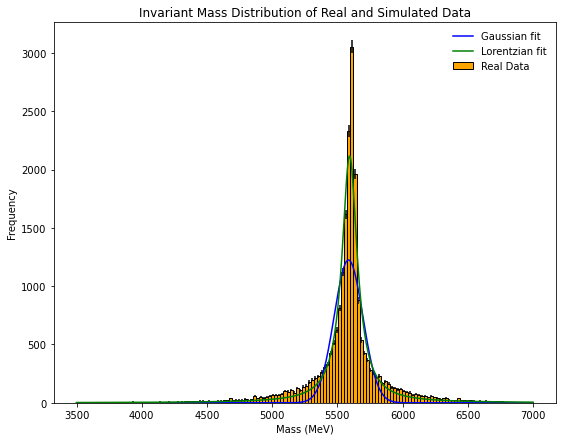

In [9]:
popt2, pcov2 = curve_fit(sf.scaled_lorentzian, x, y, [800000, 5500, 190], yerr, absolute_sigma=True)
fig, ax = plt.subplots(1, 1, figsize=(9, 7))
func_x = np.linspace(low_mass_limit, high_mass_limit, 500)
ax.bar(d1[:,0], d1[:,1], width=bin_width, yerr=d1[:,2], label='Real Data', edgecolor='k',color='orange')

ax.plot(func_x, sf.gaussian(func_x, *popt1), label='Gaussian fit', color='blue')
ax.plot(func_x, sf.scaled_lorentzian(func_x, *popt2), label='Lorentzian fit', color='green')

ax.set_xlabel('Mass (MeV)')
ax.set_ylabel('Frequency')
plt.legend(frameon=False)
plt.title('Invariant Mass Distribution of Real and Simulated Data')
plt.savefig('/home/user211/project/images/signalfits/lorentz_and_gauss.png', dpi=800)
plt.show()

In [11]:
from scipy.stats import crystalball

# Defined with cball(x, beta, m, loc, scale) loc is shift and scale is scaling
popt3, pcov3 = curve_fit(crystalball.pdf, x, y, [2, 1.5, 5500, 2.7], yerr, absolute_sigma=True)

/cvmfs/lhcbdev.cern.ch/conda/envs/default/2021-09-07_04-06/linux-64/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


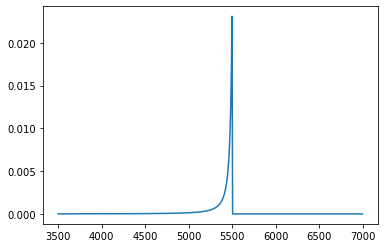

In [30]:
beta, m = 1, 1
xs = np.linspace(3500, 7000, 500)
ys = crystalball.pdf(xs, 0.05, 2, 5500, 1)
plt.plot(xs, ys)
plt.show()